### Data Cleaning

#### 1.Handle any missing values and duplicates in the dataset. Describe your process.

In [2]:
import pandas as pd 
import numpy as np
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
path="/Users/admin/Downloads/archive/"
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [45]:
aisles = pd.read_csv(path + 'aisles.csv')
departments = pd.read_csv(path + 'departments.csv')
orders = pd.read_csv(path + 'orders.csv')
order_products_prior = pd.read_csv(path + 'order_products__prior.csv')
order_products_train = pd.read_csv(path + 'order_products__train.csv')
products = pd.read_csv(path + 'products.csv')

In [48]:
##order_products_prior = pd.merge(order_products_prior,products, on=["product_id"]) 
##order_products_prior = pd.merge(order_products_prior,departments, on=["department_id"]) 
##order_products_prior = pd.merge(order_products_prior,aisles, on=["aisle_id"]) 

In [52]:
order_products_prior = pd.merge(orders,order_products_prior, on=["order_id"]) 

In [8]:
#merging orders and train orders 

train_orders = orders.merge(order_products_train, on = ["order_id"])

In [11]:
## only keeping necessary columns on train orders

train_orders.drop(['eval_set', 'add_to_cart_order', 'order_id'], axis = 1, inplace = True)

In [15]:
## observing the unique users in the dataframe

train_cx = train_orders.user_id.unique()
train_cx[:10]

array([ 1,  2,  5,  7,  8,  9, 10, 13, 14, 17])

Now identifying the missing values in the data as given

In [19]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [20]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [21]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [22]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [23]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [24]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Clearly, apart from orders df, null values are found in neither of the tables. Checking the proportion or orders-rows which are contributing to null values.

In [25]:
orders.shape

(3421083, 7)

In [26]:
20620900/3421083

6.027594185817766

About 6% of the rows have null values for the column "days_since_prior_order". Checking if this means that these are users' first order respectively. 

In [28]:
orders[orders["order_number"]==1].isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Clearly, it is understood that days_since_prior_order being null is the first order for the user, overall. Therefore, need to assign 0 for these above mentioned values. 

In [40]:
orders.fillna(0, inplace=True)

In [41]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.000
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000
3,2254736,1,prior,4,4,7,29.000
4,431534,1,prior,5,4,15,28.000
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.000
3421079,1854736,206209,prior,11,4,10,30.000
3421080,626363,206209,prior,12,1,12,18.000
3421081,2977660,206209,prior,13,1,12,7.000


To check for duplicates on any given dataframe. 

In [44]:
print(orders[orders.duplicated()])

Empty DataFrame
Columns: [order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [45]:
print(products[products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [46]:
print(order_products_prior[order_products_prior.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [47]:
print(departments[departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [48]:
print(aisles[aisles.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Clearly no duplicate found on any of the given dataframes. 

#### 3.Create features to analyse customer buying patterns, such as the frequency of purchases and time between orders. 

For overall order analysis, we need to combine both prior and train data order. Will merge the product details, aisles, orders and dept. data to perform analysis for only one single dataframe. 

In [50]:
orders_overall = order_products_prior.append(order_products_train)

In [51]:
orders_overall.shape

(33819106, 4)

In [53]:
orders_overall = orders_overall.merge(products, on ='product_id', how='left')
orders_overall = orders_overall.merge(aisles, on ='aisle_id', how='left')
orders_overall = orders_overall.merge(departments, on ='department_id', how='left')
orders_overall = orders_overall.merge(orders, on ='order_id', how='left')
orders_overall.shape

(33819106, 15)

In [77]:
orders_overall.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.000
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.000
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.000
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.000
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.000


In [84]:
orders_overall.groupby(["eval_set"]).agg({"user_id":"nunique","order_id":"nunique"}).rename(columns={"user_id":"total_users","order_id":"total_orders"})

,total_users,total_orders
eval_set,,
prior,206209,3214874
train,131209,131209


There are about 206K users, 131,209 customers are given as train.



Lets check the order frequency. to understand the distribution, lets first look only prior orders. 

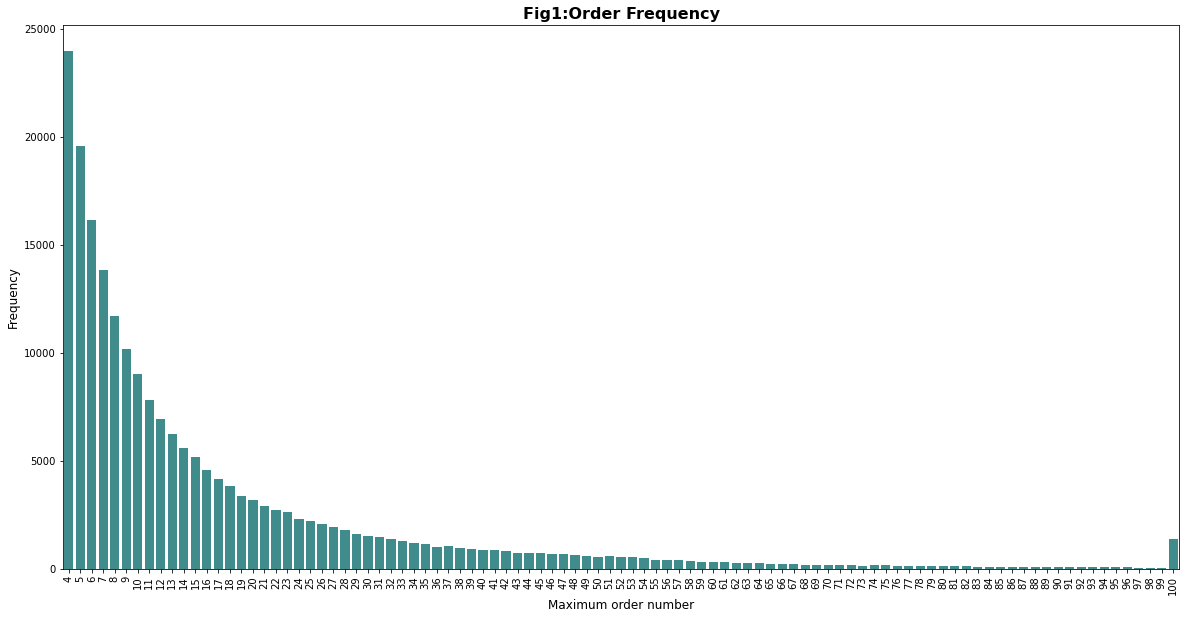

In [102]:
order_freq_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
order_freq_srs = order_freq_srs.order_number.value_counts()


plt.figure(figsize=(20,10))
sns.barplot(order_freq_srs.index, order_freq_srs.values, alpha=0.8, color= 'teal')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.title('Fig1:Order Frequency', fontsize=16,weight='bold')
plt.xticks(rotation='vertical')
plt.show()

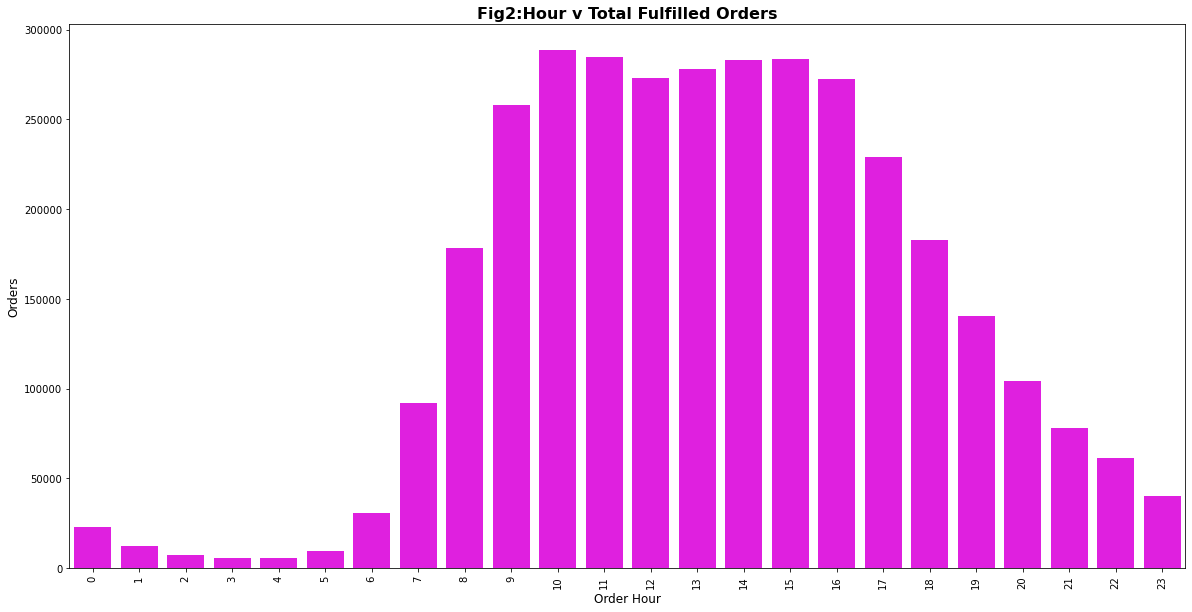

In [103]:


plt.figure(figsize=(20,10))
sns.countplot(x='order_hour_of_day', data = orders, color = 'magenta')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Order Hour', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Fig2:Hour v Total Fulfilled Orders', fontsize=16,weight='bold')
plt.show()

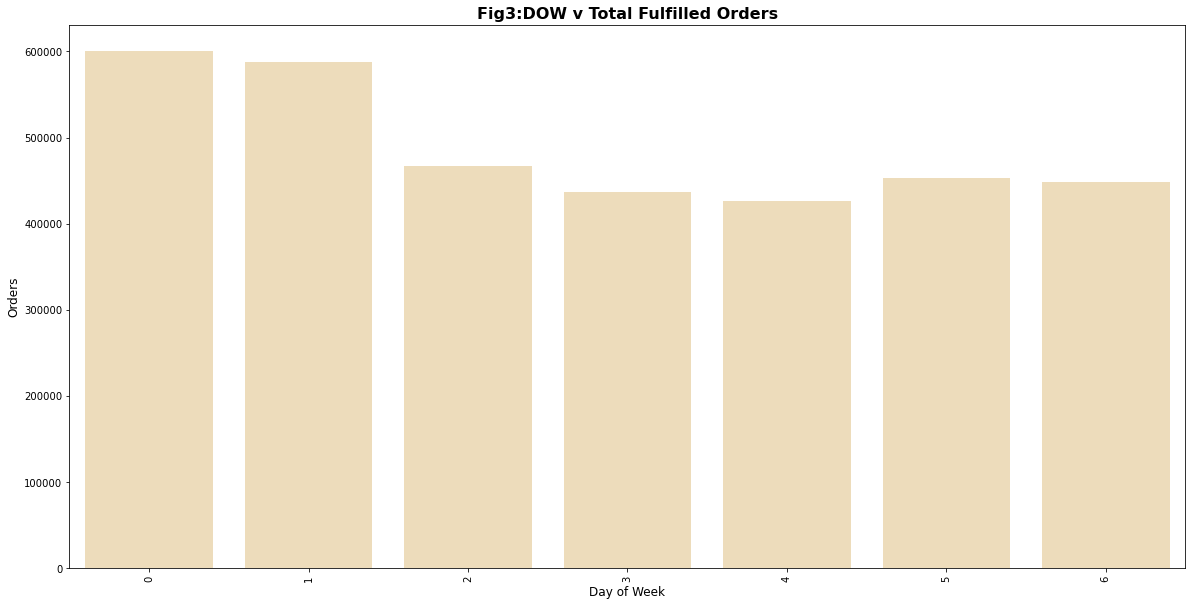

In [107]:
plt.figure(figsize=(20,10))
sns.countplot(x='order_dow', data = orders, color = 'wheat')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Fig3:DOW v Total Fulfilled Orders', fontsize=16,weight='bold')
plt.show()

###### Summary 

1. Min number of orders are 4 and 100 being the max. Let's check the time of the day when the orders are being fulfilled. (fig1)
2. We generally see a high orders between 1000 and 1600hrs(Fig2)
3. We can assume that day0 and day1 are weekends ie saturday and sunday. We see low orders on mid of the week ie Wednesday.(Fig3) 

To get a better picture we combine it all and check day.week with hour of time. 

In [110]:
merged_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].agg("count").reset_index()
merged_df= merged_df.pivot("order_dow","order_hour_of_day","order_number")

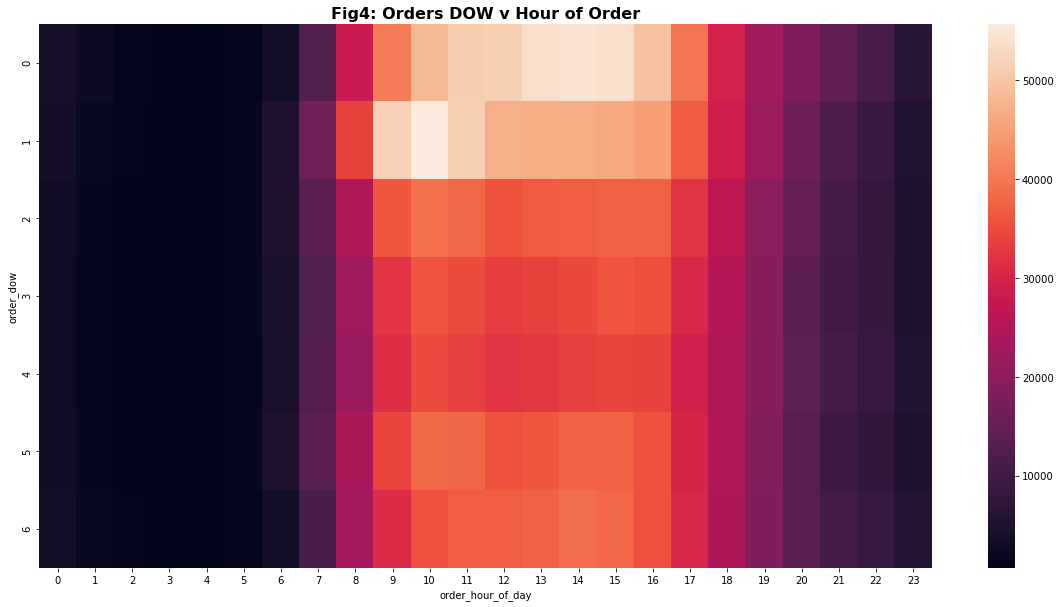

In [114]:
plt.figure(figsize=(20,10))
sns.heatmap(merged_df)
plt.title("Fig4: Orders DOW v Hour of Order",weight='bold',fontsize=16)
plt.show()

As mentioned before, Saturday and Sunday are busy days with Sunday-morns and saturday evenings being busy times of the days. 

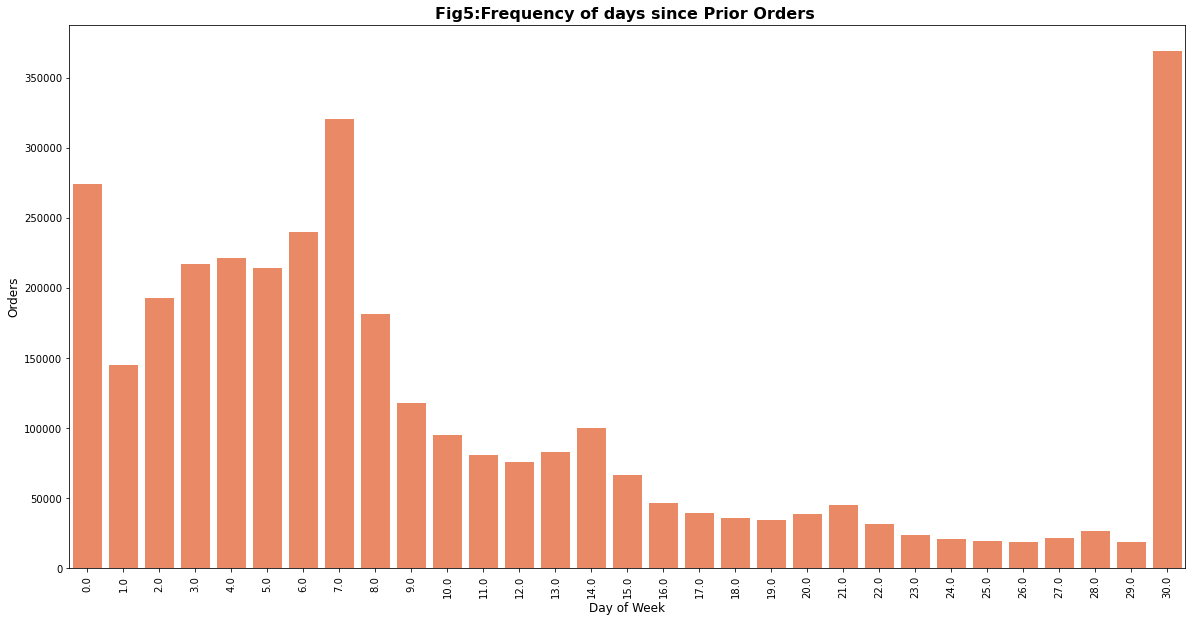

In [116]:
##Checking the time between orders wrt prior orders

plt.figure(figsize=(20,10))
sns.countplot(x='days_since_prior_order', data = orders, color = 'coral')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Fig5:Frequency of days since Prior Orders ', fontsize=16,weight='bold')
plt.show()

Customers generally order once every 7days(or weekly), but it dips massively once we see 14/21/28D prior orders and a spike on 30th day clearly indicating a monthly frequency.

In [119]:
##Looking at re-orders in train and prior dfs. 

#prior

(order_products_prior.reordered.sum()*100.00)/order_products_prior.shape[0]



58.969746679221615

In [120]:
##train reorders

(order_products_train.reordered.sum()*100.00)/order_products_train.shape[0]

59.85944127509629

About 59% of products are being re-ordered. 

In [121]:
# Non reordered products
no_reorders = order_products_prior.groupby(["order_id"])["reordered"].agg("sum").reset_index()
no_reorders

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0
...,...,...
3214869,3421079,0
3214870,3421080,4
3214871,3421081,0
3214872,3421082,4


In [130]:
no_reorders=no_reorders[no_reorders["reordered"]==0].agg({"order_id":"nunique"})

In [127]:
total_orders = order_products_prior["order_id"].nunique()

In [131]:
(100.00*no_reorders)/total_orders

order_id   12.085
dtype: float64

In [132]:
# Non reordered products for train
no_reorders_train = order_products_train.groupby(["order_id"])["reordered"].agg("sum").reset_index()
no_reorders_train

,order_id,reordered
0,1,4
1,36,6
2,38,1
3,96,5
4,98,45
...,...,...
131204,3421049,1
131205,3421056,3
131206,3421058,7
131207,3421063,4


In [135]:
(100.00*no_reorders_train[no_reorders_train["reordered"]==0].agg({"order_id":"nunique"}))/order_products_train["order_id"].nunique()

order_id   6.556
dtype: float64

About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

In [25]:
df1 = order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

In [29]:
df1 = df1.sort_values(by="reordered",ignore_index=False, ascending=False)


In [30]:
print(df1.reset_index())


    index       department  reordered
0       7       dairy eggs      0.670
1       3        beverages      0.653
2      19          produce      0.650
3       2           bakery      0.628
4       8             deli      0.608
5      18             pets      0.601
6       1           babies      0.579
7       5             bulk      0.577
8      20           snacks      0.574
9       0          alcohol      0.570
10     13     meat seafood      0.568
11      4        breakfast      0.561
12     10           frozen      0.542
13      9  dry goods pasta      0.461
14      6     canned goods      0.457
15     15            other      0.408
16     11        household      0.402
17     14          missing      0.396
18     12    international      0.369
19     16           pantry      0.347
20     17    personal care      0.321


Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.



In [34]:
df_aisle = order_products_prior.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
df_aisle = df_aisle.sort_values(by="reordered",ignore_index=False, ascending=False)
print(df_aisle)

                             aisle  reordered
83                            milk      0.781
131  water seltzer sparkling water      0.730
50                    fresh fruits      0.718
41                            eggs      0.705
119                soy lactosefree      0.693
..                             ...        ...
8                           beauty      0.212
76                kitchen supplies      0.195
47                       first aid      0.195
7            baking supplies decor      0.167
122              spices seasonings      0.152

[134 rows x 2 columns]


The aisle milk has the highest reorder ration while spices seasonings has the lowest. 

In [56]:
####Cumulative Sum of Unique Users Per Product

###For understanding the user behaviour, we check the reorder-order ratio as well. 

df1 = order_products_prior.groupby("product_name")["user_id"].nunique().reset_index().rename(columns={"user_id":"total_users"})
df1.sort_values('total_users', ascending=False).head(10)

,product_name,total_users
3676,Banana,73956
3471,Bag of Organic Bananas,63537
31920,Organic Strawberries,58838
28840,Organic Baby Spinach,55037
22413,Large Lemon,46402
23420,Limes,44859
30297,Organic Hass Avocado,43453
42904,Strawberries,43149
28804,Organic Avocado,42771
29008,Organic Blueberries,37138


In [63]:
df1
##["reorder_ratio"] = df1.reorders/df1.total

,product_name,total_users
0,#2 Coffee Filters,520
1,#2 Cone White Coffee Filters,10
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,152
4,& Go! Hazelnut Spread + Pretzel Sticks,77
...,...,...
49672,with Xylitol Unwrapped Original Flavor 50 Stic...,20
49673,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,36
49674,with Xylitol Watermelon Twist 18 Sticks Sugar ...,37
49675,with a Splash of Mango Coconut Water,17


In [67]:
df2 = order_products_prior.groupby("product_name")["reordered"].count().reset_index().rename(columns={"reordered":"reordered"})
df2


,product_name,reordered
0,#2 Coffee Filters,777
1,#2 Cone White Coffee Filters,13
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,241
4,& Go! Hazelnut Spread + Pretzel Sticks,164
...,...,...
49672,with Xylitol Unwrapped Original Flavor 50 Stic...,37
49673,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,55
49674,with Xylitol Watermelon Twist 18 Sticks Sugar ...,68
49675,with a Splash of Mango Coconut Water,23


In [68]:
### to calculate the reorder_ratio 
dff = pd.merge(df1,df2, on=["product_name"], how='left')
dff

,product_name,total_users,reordered
0,#2 Coffee Filters,520,777
1,#2 Cone White Coffee Filters,10,13
2,#2 Mechanical Pencils,8,8
3,#4 Natural Brown Coffee Filters,152,241
4,& Go! Hazelnut Spread + Pretzel Sticks,77,164
...,...,...,...
49672,with Xylitol Unwrapped Original Flavor 50 Stic...,20,37
49673,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,36,55
49674,with Xylitol Watermelon Twist 18 Sticks Sugar ...,37,68
49675,with a Splash of Mango Coconut Water,17,23


Text(0.5, 1.0, 'Fig6:cumilative sum of unique users per product v Users ')

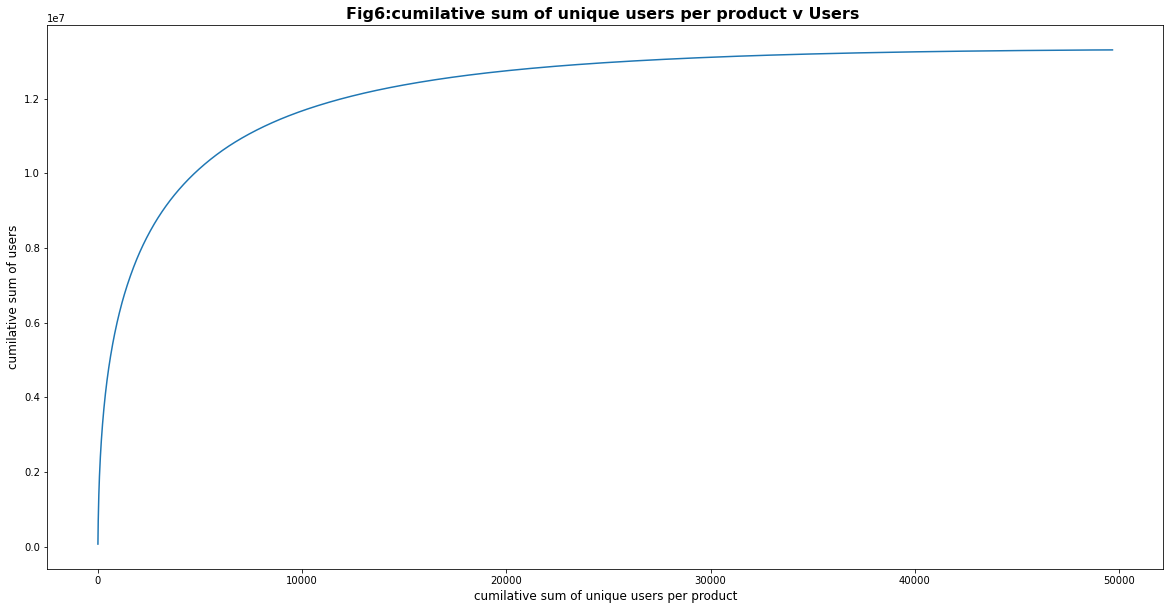

In [76]:
##cumilative sum of unique users per product


dff = dff.sort_values("total_users", ascending = False)
dff["cumilative_users"] = dff["total_users"].cumsum()
dff = dff.reset_index(drop=True)

cum_plot = plt.figure(figsize=(20,10))
cum_plot = sns.lineplot(x=dff.index,y=dff.cumilative_users)
cum_plot.set_ylabel('cumilative sum of users', fontsize=12)
cum_plot.set_xlabel('cumilative sum of unique users per product', fontsize=12)
cum_plot.set_title('Fig6:cumilative sum of unique users per product v Users ', fontsize=16,weight='bold')


There is a clear positive correlation between number of users per product and cumilative number of users. 

##### Number of users vs reorders

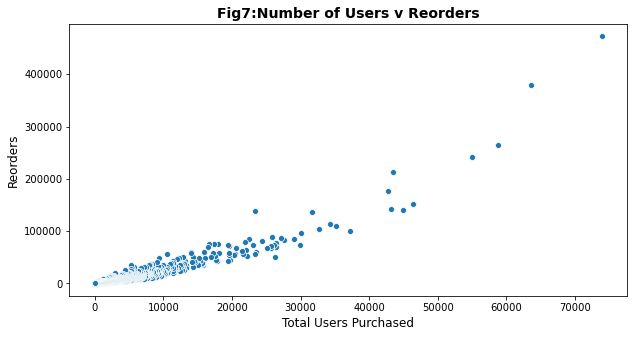

In [85]:
ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = dff.total_users, y = dff.reordered)
ax.set_ylabel('Reorders', fontsize=12)
ax.set_xlabel('Total Users Purchased', fontsize=12)
ax.set_title('Fig7:Number of Users v Reorders', fontsize=14,weight='bold')
plt.show()



In [88]:
add2cart_reorders = order_products_prior.groupby('add_to_cart_order')['reordered'].aggregate("mean").reset_index()


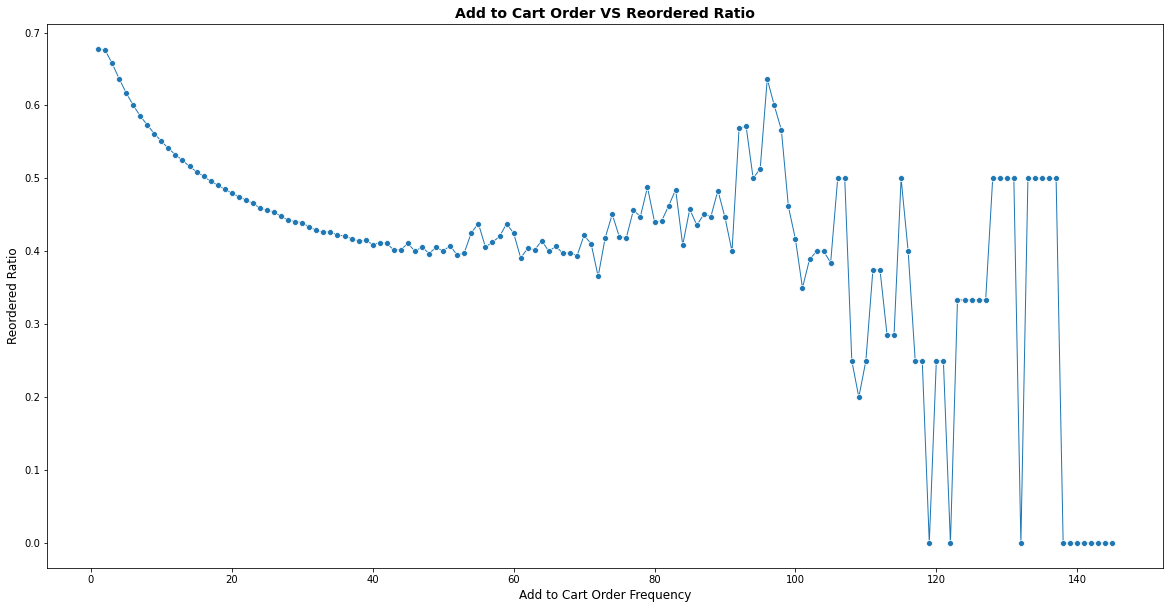

In [99]:
ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x = add2cart_reorders.add_to_cart_order, y = add2cart_reorders.reordered, lw=1, marker='o')
ax.set_ylabel('Reordered Ratio', fontsize=12)
ax.set_xlabel('Add to Cart Order Frequency', fontsize=12)                  
ax.set_title("Fig8:Add to Cart Order VS Reordered Ratio", fontsize=14,weight='bold')
plt.show()                  

Add to cart is assumed to be related to reorders. Most of the re-purchases can be linked to add to cart. 

#### 4.Aggregate the data to create customer-level datasets from order-level data. Explain the aggregation process.

In [100]:
##User Level data 

user_level_data = order_products_prior.groupby('user_id').agg({
    'order_id': 'nunique',
    'product_id': 'nunique',
    'order_number': 'max',
    'order_dow': lambda x: x.mode().iloc[0],
    'order_hour_of_day': lambda x: x.mode().iloc[0],
    'add_to_cart_order': 'mean',
    'reordered': 'mean',
    'product_name': lambda x: x.mode().iloc[0],
    'aisle_id': lambda x: x.mode().iloc[0],
    'department_id': lambda x: x.mode().iloc[0]
})



In [102]:
# Rename columns for clarity
user_level_data.columns = [
    'total_orders',
    'unique_products',
    'last_order_number',
    'most_common_order_dow',
    'most_common_order_hour',
    'avg_cart_position',
    'reorder_ratio',
    'most_common_product',
    'most_common_aisle',
    'most_common_department'
]



In [105]:
user_level_data.head(10)

,user_id,total_orders,unique_products,last_order_number,most_common_order_dow,most_common_order_hour,avg_cart_position,reorder_ratio,most_common_product,most_common_aisle,most_common_department
0,1,10,18,10,4,7,3.627,0.695,Original Beef Jerky,77,19
1,2,14,102,14,2,9,8.554,0.477,Chipotle Beef & Pork Realstick,120,16
2,3,12,33,12,0,16,4.443,0.625,Vanilla Unsweetened Almond Milk,24,4
3,4,5,17,5,4,15,2.778,0.056,Enchilada Black Bean Vegetable,38,1
4,5,4,23,4,3,18,5.514,0.378,Organic Blackberries,123,4
5,6,3,12,3,4,16,3.143,0.143,Ground Turkey Breast,83,4
6,7,20,68,20,0,9,7.252,0.670,Lactose Free Fat Free Milk,31,4
7,8,3,36,3,6,0,9.020,0.265,Carrots,83,4
8,9,3,58,3,5,12,15.276,0.237,Almond Non-Dairy Yogurt Made From Real Almonds...,120,16
9,10,5,94,5,5,15,17.881,0.343,Asparagus,83,4


In [104]:
# Reset index to make user_id a column
user_level_data = user_level_data.reset_index()
